# Actividad Guiada 2
Lidia Fabra Cuenca

https://github.com/lidiaf28/03MIAR-Algoritmos-de-optimizacion/blob/main/LidiaFabra_AG2.ipynb

## Programación Dinámica. Viaje por el rio



* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

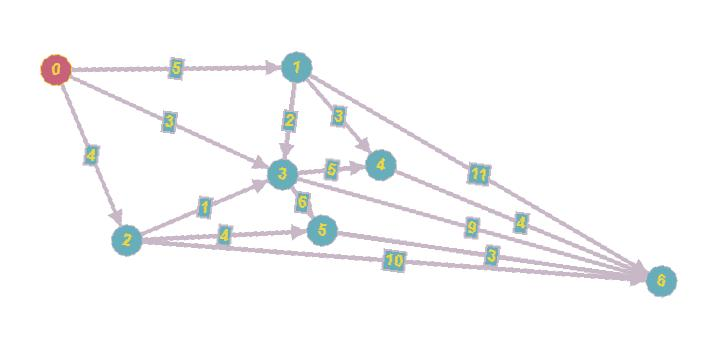

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
import math

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################
#El precio de los caminos desde 0 hasta el nodo correspondiente
#El 999 es una manera de indicar que el nodo no tiene camino directo, ya que se esta buscando el numero minimo,
#por tanto se pone un numero muy alto
TARIFAS = [
[0,5,4,3,float("inf"),999,999],  #desde nodo 0 (tiene camino con nodo 1,2,3)
[999,0,999,2,3,999,11],  #desde nodo 1 ( para el 0 es 999 porque no queremos ir hacia atrás)
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math (valor flotante mas grande que tengas)
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios y la ruta
  #se crea una lista con otra lista anidada con N elementos todos inicializados a 9999
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  # para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
    #nodo 0 y 1. tarifa 5
    #nodo 0 y 4. tarifa 999
      MIN = TARIFAS[i][j]
      #nodo del salto, para llegar de 0 a 1 (él mismo, directo)
      RUTA[i][j] = i
      #bucle interior para recorrer los caminos intermedios entre i(origen) y j(destino)
      #si no hay camino intermedio no entra (porque van en orden)
      for k in range(i, j):
          #nodo 1 y 4: precios= 5 (porque es el minimo de la iteracion anterior) ; tarifas=3
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            #me guardo el camino intermedio
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

      print(i,j,'****************')
      print("PRECIOS")
      for m in range(len(TARIFAS)):
          print(PRECIOS[m])

      print("\nRUTA")
      for m in range(len(TARIFAS)):
          print(RUTA[m])

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)

0 1 ****************
PRECIOS
[9999, 5, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
0 2 ****************
PRECIOS
[9999, 5, 4, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', '', '']
['', '', '', '', '', 

In [ ]:
# PRECIOS,RUTA = Precios(TARIFAS)
# #print(PRECIOS[0][6])
# print("PRECIOS")
# for i in range(len(TARIFAS)):
#   print(PRECIOS[i])

# print("\nRUTA")
# for i in range(len(TARIFAS)):
#   print(RUTA[i])

In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

Hay 4 agentes y 4 tareas que hay que asignar a esos agentes. Solo se puede asignar una tardea por agente.
El problema consiste en minimizar los costes.

Haciendolo por fuerza bruta, se calculan todas las opciones posibles (permutaciones), y calculas todos los costes sobre todas las opciones. De ahi se clasifica de la mas barata a la mas cara y te quedas con la solucion mínima.

In [ ]:
# Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR

valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales (asignar dos ultimas posiciones)
# (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos (ya hay dos asignadas)
  for i in range(len(S)):
    #sumas valor de costes
    VALOR += COSTES[i][S[i]]

  #Estimacion (de lo que falte, busca la combinacion minima)
  for i in range( len(S), len(COSTES)):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES)) ])
  return VALOR
#Coste superior para soluciones parciales
def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES) ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)
#CS((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3) (posibles hijos para agente 1)
#transformar una tupla y añadirle uno mas
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,) })
  return HIJOS

In [ ]:
crear_hijos((0,), 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  #mejor de las soluciones posibles dentificadas hasta el momento.
  #Si alguna rama tiene cota iferior por encima de este maximo, se poda
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)
  #intentar no hacer exploracion completa, estructura tipo lista para anidar nodos
  NODOS=[]
 #añadiendo estas a evaluar
 # empieza tupla vacia,con cota inferior con la suma de los 4 menores numeros posibles
  NODOS.append({'s':(), 'ci':CI((),COSTES) } )

  iteracion = 0 #saber si es eficiente
  # mientras siga añadiendo nodos, continua el bucle
  while( len(NODOS) > 0):
    iteracion +=1
    #de todos los nodos, me quedo con el mas prometedor
    # con la funcion lambda te devuelve el campo que quieres evaluar
    #Esta expresión encuentra el nodo con el valor mínimo de 'ci' en la lista NODOS, y te devueve el estado del nodo
    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos (llamar a la funcion crear hijos sobre la dimension total)
    #si tengo la tarea 1 asignada al nodo 0, me quedan la tarea 0,2,3 por asignar, que irán al siguiente nodo (que serán los hijos en el arbol)
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)  } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    #si ya estan todos los nodos asignados a una tarea en el array de hijos,identificar cumplen todo el estado definido. Nodos finakles
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    #si tengo nodo final...
    if len(NODO_FINAL) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      #..con cota inferior por debajo de la cota superior
      if NODO_FINAL[0]['ci'] < CotaSup:
          #actualizo valor cota superior con la inferior y considero que ese nodoe es la mejor solucion
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda (solo me quedo con los hijos cuya cota inferior mejore la cota superior) te quitas caminos, porque sabes que son peores de los que tienes
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup  ]

    #Añadimos los hijos (si queda alguno)
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
      #si he encontrado una rama prometedora, todo lo que no cuelgue de la rama esa se elimina)
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor   ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
#cuando acabas una de las ramas con sus hijos, vuelves a ver la rama que es hermana de la que has visitado al principio
#y evaluas si vale la pena recorrer ese subarbol, mirando la solucion de sus hijos (si uno de los hijos tiene pero cota, te la cargas), estando en la posicion del padre)

In [ ]:
ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc
import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente(derivada)

df([1,2])

[2, 4]

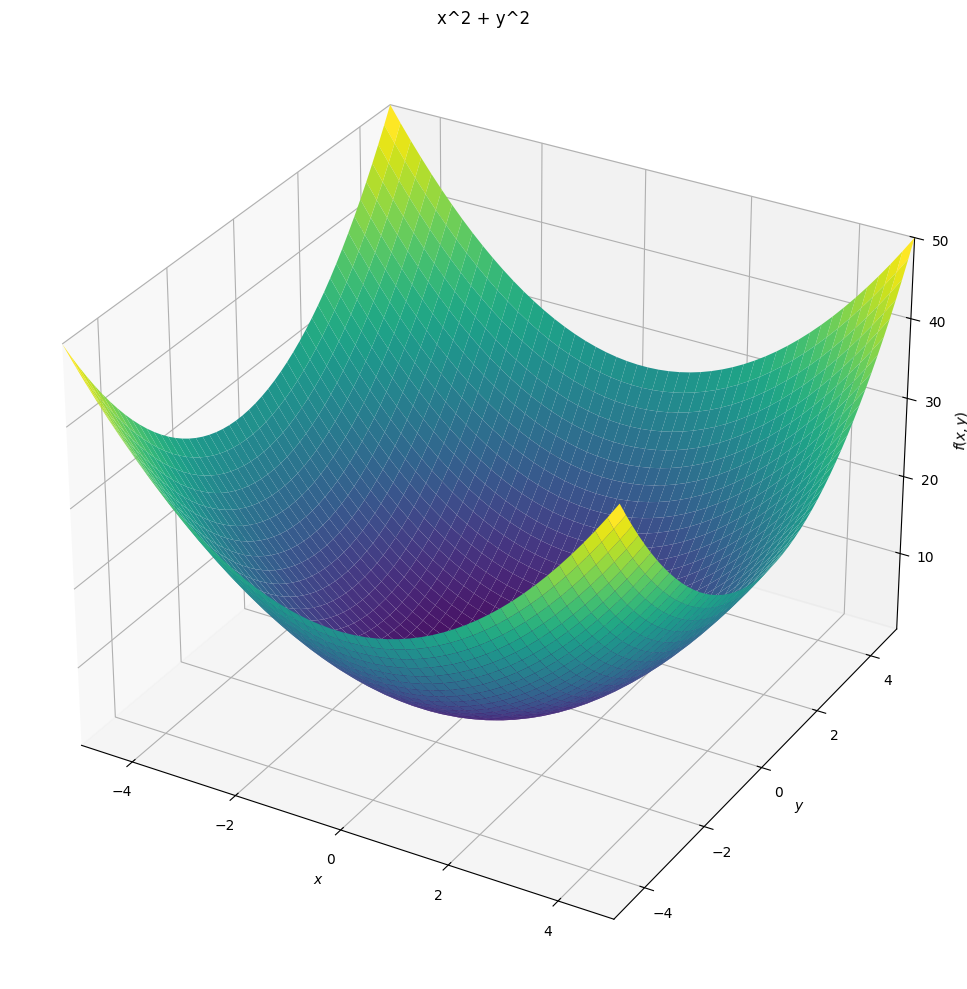

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
#crear gráficos en 3D de funciones matemáticas
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),   #rango de valores
       title='x^2 + y^2',
       size=(10,10))

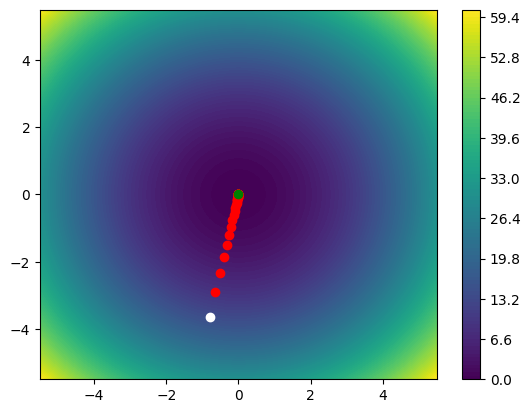

Solucion: [-1.1459406439640891e-05, -5.190083180518121e-05] 2.825014338018593e-09


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1
#Iteraciones:50
for _ in range(50):
  grad = df(P)
  # print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]  #formula de los apuntes
  #Graficar los puntos de cada iteración en un plano para visualizar el progreso hacia el mínimo
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde (grafico con iteraciones)
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

In [ ]:
#Definimos otra funcion
f  = lambda X: np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
df = lambda X: -1/2 * X[1] * np.cos(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1]) + np.e**X[1] * np.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * np.sin(2 * X[0] + 1 - np.e**X[1])
df([0,1])

from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')

plot3d(np.sin(1/2 * x**2 - 1/4 * y**2 + 3) * np.cos(2*x + 1 - np.e**y),
       (x,-5,5),(y,-5,5),   #rango de valores
       title='Segunda funcion',
       size=(10,10))

TypeError: loop of ufunc does not support argument 0 of type Add which has no callable sin method